In [23]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [24]:
import re
import numpy as np
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk


import warnings
%matplotlib inline

In [25]:
df=pd.read_excel("/content/gdrive/MyDrive/Tweet_NFT/Tweet_NFT.xlsx")
df.head()

,id,tweet_text,tweet_created_at,tweet_intent
0,1212762.0,@crypto_brody @eCoLoGy1990 @MoonrunnersNFT @It...,2022-08-06T16:56:36.000Z,Community
1,1212763.0,Need Sick Character artâ_x009d_“#art #artist #...,2022-08-06T16:56:36.000Z,Giveaway
2,1212765.0,@The_Hulk_NFT @INagotchiNFT @Tesla @killabears...,2022-08-06T16:56:35.000Z,Appreciation
3,1212766.0,@CryptoBatzNFT @DarekBTW The first project in ...,2022-08-06T16:56:35.000Z,Community
4,1212767.0,@sashadysonn The first project in crypto with ...,2022-08-06T16:56:34.000Z,Community


In [26]:
df.shape

(127453, 4)

## Preprocessing the data

In [27]:
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [28]:
# remove twitter handles (@user)(#user)
df['tweet_text'] = np.vectorize(remove_pattern)(df['tweet_text'], "@[\w]*")
# df['tweet_text'] = np.vectorize(remove_pattern)(df['tweet_text'], "#[\w]*")

In [29]:
df.head()

,id,tweet_text,tweet_created_at,tweet_intent
0,1212762.0,ðŸ_x0090_¶ A new cryptocurrency ...,2022-08-06T16:56:36.000Z,Community
1,1212763.0,Need Sick Character artâ_x009d_“#art #artist #...,2022-08-06T16:56:36.000Z,Giveaway
2,1212765.0,Great choice on a Tesla! Good luck!,2022-08-06T16:56:35.000Z,Appreciation
3,1212766.0,The first project in crypto with move to ear...,2022-08-06T16:56:35.000Z,Community
4,1212767.0,The first project in crypto with move to earn...,2022-08-06T16:56:34.000Z,Community


In [30]:
# remove special characters, numbers and punctuations (POS tagging)
df['tweet_text'] = df['tweet_text'].str.replace("[^a-zA-Z#]", " ")
df.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


,id,tweet_text,tweet_created_at,tweet_intent
127448,1278721.0,My company Universe is solving this and we v...,2022-08-08T03:32:01.000Z,NaN
127449,1278723.0,Many will get rekt in this NFT,2022-08-08T03:32:00.000Z,NaN
127450,1278724.0,of HODL #HODL HANDS #NFT funds stay...,2022-08-08T03:32:00.000Z,NaN
127451,1278725.0,I love this job,2022-08-08T03:31:59.000Z,NaN
127452,1278729.0,my proof https t co DI P gz,2022-08-08T03:31:58.000Z,NaN


In [31]:
# stop word removel
df['tweet_text'] = df['tweet_text'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,id,tweet_text,tweet_created_at,tweet_intent
0,1212762.0,cryptocurrency born fans Chihuahua meme commun...,2022-08-06T16:56:36.000Z,Community
1,1212763.0,Need Sick Character #art #artist #Artists #ani...,2022-08-06T16:56:36.000Z,Giveaway
2,1212765.0,Great choice Tesla Good luck,2022-08-06T16:56:35.000Z,Appreciation
3,1212766.0,first project crypto with move earn #AstroBird...,2022-08-06T16:56:35.000Z,Community
4,1212767.0,first project crypto with move earn #AstroBird...,2022-08-06T16:56:34.000Z,Community


In [32]:
# word Tokenizer
tokenized_tweet = df['tweet_text'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [cryptocurrency, born, fans, Chihuahua, meme, ...
1    [Need, Sick, Character, #art, #artist, #Artist...
2                   [Great, choice, Tesla, Good, luck]
3    [first, project, crypto, with, move, earn, #As...
4    [first, project, crypto, with, move, earn, #As...
Name: tweet_text, dtype: object

In [33]:
# stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [cryptocurr, born, fan, chihuahua, meme, commu...
1    [need, sick, charact, #art, #artist, #artist, ...
2                    [great, choic, tesla, good, luck]
3    [first, project, crypto, with, move, earn, #as...
4    [first, project, crypto, with, move, earn, #as...
Name: tweet_text, dtype: object

In [34]:
# combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df['clean_tweet'] = tokenized_tweet
df.head()

,id,tweet_text,tweet_created_at,tweet_intent,clean_tweet
0,1212762.0,cryptocurrency born fans Chihuahua meme commun...,2022-08-06T16:56:36.000Z,Community,cryptocurr born fan chihuahua meme commun just...
1,1212763.0,Need Sick Character #art #artist #Artists #ani...,2022-08-06T16:56:36.000Z,Giveaway,need sick charact #art #artist #artist #anim #...
2,1212765.0,Great choice Tesla Good luck,2022-08-06T16:56:35.000Z,Appreciation,great choic tesla good luck
3,1212766.0,first project crypto with move earn #AstroBird...,2022-08-06T16:56:35.000Z,Community,first project crypto with move earn #astrobird...
4,1212767.0,first project crypto with move earn #AstroBird...,2022-08-06T16:56:34.000Z,Community,first project crypto with move earn #astrobird...


## EDA

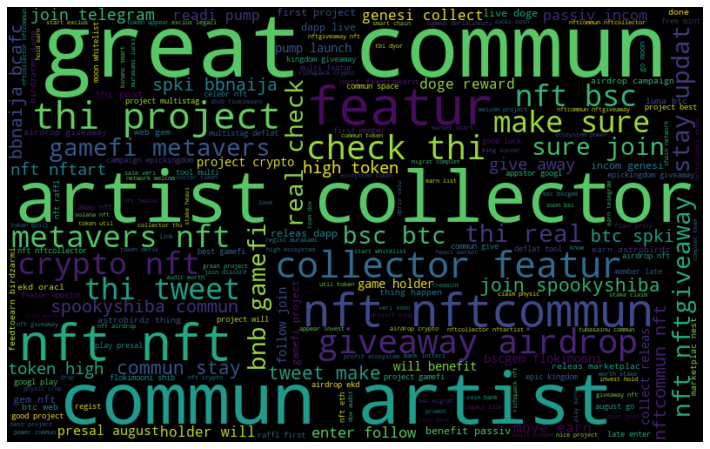

In [35]:
# word cloud
all_words = " ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [36]:
# extract the hashtag
def hashtag_extract(tweets):
    hashtags = []
    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags   

In [37]:
# extract hashtags from  tweets
hashtags = hashtag_extract(df['clean_tweet'])



In [38]:
hashtags[:500]

[[],
 ['art',
  'artist',
  'artist',
  'anim',
  'illustr',
  'illustr',
  'illustrationart',
  'nft',
  'nftgiveaway',
  'conceptart',
  'concept',
  'illustr',
  'solananft',
  'artistontwitt'],
 [],
 ['astrobirdz',
  'nest',
  'feedtoearn',
  'birdzarmi',
  'luna',
  'btc',
  'web',
  'gem',
  'nft',
  'nftcommun'],
 ['astrobirdz',
  'nest',
  'feedtoearn',
  'birdzarmi',
  'luna',
  'btc',
  'web',
  'gem',
  'nft',
  'nftcommun'],
 [],
 ['nftnyc', 'nftgiveaway', 'nftcommun', 'nft'],
 ['project', 'gamefi'],
 [],
 ['project', 'gamefi'],
 [],
 [],
 ['freemint'],
 ['incubexwetrust', 'cubextakeov', 'nftcommun', 'nft'],
 ['project', 'gamefi'],
 [],
 [],
 ['moonbeam', 'polkadot', 'nft', 'nftart'],
 ['project', 'gamefi'],
 [],
 ['project', 'gamefi'],
 ['project', 'gamefi'],
 [],
 ['hashaxi', 'hederahashgraph', 'hbarnft', 'hbarcommun', 'digitalartist'],
 ['gamefi'],
 ['nft', 'nft'],
 [],
 [],
 [],
 ['astrobirdz',
  'nest',
  'feedtoearn',
  'birdzarmi',
  'luna',
  'btc',
  'web',
  'gem'

In [18]:
# unnest list
hashtags = sum(hashtags, [])


In [19]:
freq = nltk.FreqDist(hashtags)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,art,1914
1,artist,276
2,anim,251
3,illustr,100
4,illustrationart,2


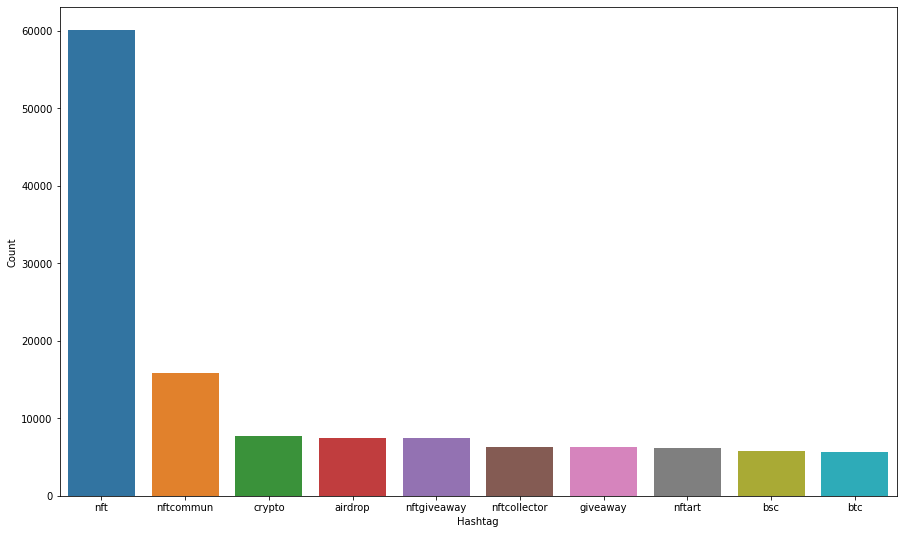

In [20]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

## Calculate Sentiment

In [41]:
# Import textblob
from textblob import Word, TextBlob

In [39]:
df.head()

,id,tweet_text,tweet_created_at,tweet_intent,clean_tweet
0,1212762.0,cryptocurrency born fans Chihuahua meme commun...,2022-08-06T16:56:36.000Z,Community,cryptocurr born fan chihuahua meme commun just...
1,1212763.0,Need Sick Character #art #artist #Artists #ani...,2022-08-06T16:56:36.000Z,Giveaway,need sick charact #art #artist #artist #anim #...
2,1212765.0,Great choice Tesla Good luck,2022-08-06T16:56:35.000Z,Appreciation,great choic tesla good luck
3,1212766.0,first project crypto with move earn #AstroBird...,2022-08-06T16:56:35.000Z,Community,first project crypto with move earn #astrobird...
4,1212767.0,first project crypto with move earn #AstroBird...,2022-08-06T16:56:34.000Z,Community,first project crypto with move earn #astrobird...


In [44]:
# Calculate polarity & subjectivity
df['polarity'] = df['clean_tweet'].apply(lambda x: TextBlob(x).sentiment[0])
df['subjectivity'] = df['clean_tweet'].apply(lambda x: TextBlob(x).sentiment[1])
df[['clean_tweet', 'tweet_intent', 'polarity', 'subjectivity']].head()

,clean_tweet,tweet_intent,polarity,subjectivity
0,cryptocurr born fan chihuahua meme commun just...,Community,0.500000,0.600000
1,need sick charact #art #artist #artist #anim #...,Giveaway,-0.714286,0.857143
2,great choic tesla good luck,Appreciation,0.750000,0.675000
3,first project crypto with move earn #astrobird...,Community,0.250000,0.333333
4,first project crypto with move earn #astrobird...,Community,0.250000,0.333333
